<a href="https://colab.research.google.com/github/silventesa/challenge-mole/blob/francesco/image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reviewed code

In [129]:
#function for image preprocessing
#from skimage import exposure
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from cv2 import bilateralFilter
#rom numpy import uint8

D = 9
SIGMACOLOR = 75
SIGMASPACE = 75 #sigmaSpace[, borderType]]

def preprocess_image(image, vgg16=False, mobilenet=True, bilateral=True):
  #making image clearer. Is it really better for the CNN ? 
  #img_adp= exposure.equalize_adapthist(img, clip_limit=0.03)
  #inverting to bgr  
  #img_bgr = img_adp[..., ::-1]
  #applying bilateral filtering returning float
  #bilateral applied before specific preprocessing for CNN
  if bilateral:
    image = bilateralFilter(image, d=D, sigmaColor=SIGMACOLOR, sigmaSpace=SIGMASPACE)  
  #The images are converted from RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset, without scaling. Returning float.
  if vgg16:
    image = vgg16_preprocess(image, data_format=None)
  elif mobilenet:
    image = mobilenet_preprocess(image, data_format=None)
  #converting float to integer uint8 (not needed)
  #image = image.astype(uint8)
  return image

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


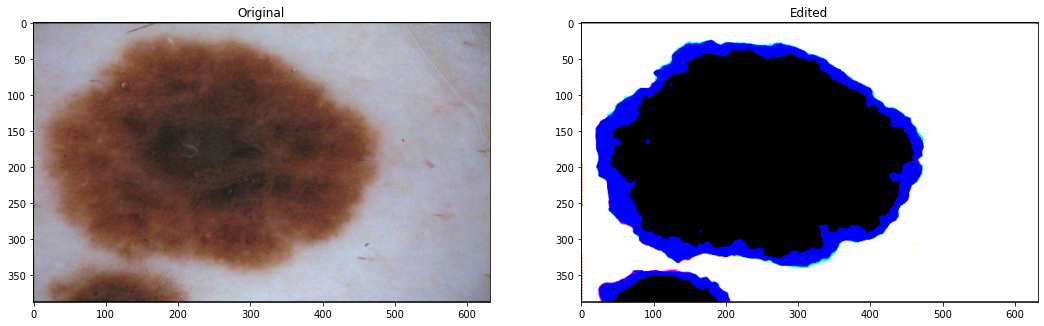

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


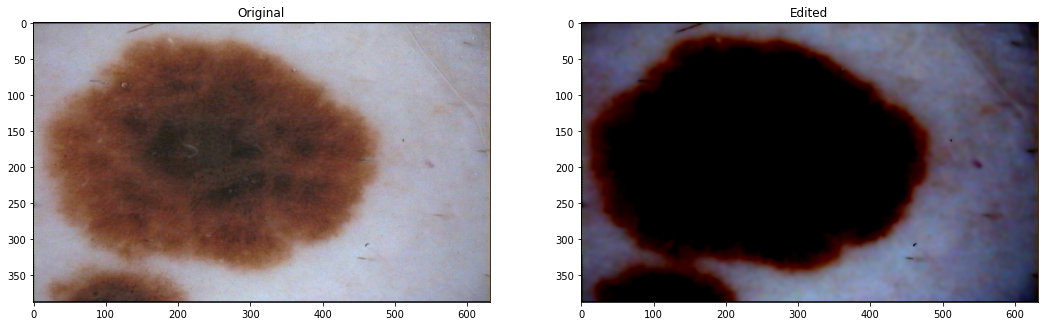

In [130]:
"""example of preprocessing on one image"""

import matplotlib.pyplot as plt
#image for loading through matplotlib, similar options from other libraries (e.g. keras) are available too
from matplotlib import image

from google.colab import drive
drive.mount('/content/drive/')

folder = "/content/drive/My Drive/labeled_dataset/class_d/"
filename = 'd_d199.bmp'
img=image.imread(folder+filename)
img_edited_vgg16 = preprocess_image(img, vgg16=True)
img_edited_mobilenet = preprocess_image(img)


#function to show difference between previous and edited image for testing purpose
def display_two(original_img, edited_img, title1 = "Original", title2 = "Edited"):    
    plt.figure(figsize=(18,13))
    plt.subplot(121)
    plt.imshow(original_img)
    plt.title(title1)
    #, plt.xticks([]), plt.yticks([])    
    plt.subplot(122)    
    plt.imshow(edited_img)
    plt.title(title2)
    #, plt.xticks([]), plt.yticks([])
    plt.show()

display_two(img, img_edited_vgg16)
display_two(img, img_edited_mobilenet)

# Testing area
Useful links which could be considered
https://stackoverflow.com/questions/48190894/how-to-convert-rgb-images-dataset-to-single-channel-grayscale/48191164

In [ ]:
from skimage import exposure
from skimage import color
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

#testing function for cats & dogs
def preprocess_image(image):
  img_adp= exposure.equalize_adapthist(img, clip_limit=0.03)
  #inverting to bgr
  img_bgr = img_adp[..., ::-1]

  """  
  #ignoring grey preprocessing
  img_adp_gry=color.rgb2gray(img_adp)
  fig, ax = plt.subplots()
  plt.close("all")
  canvas = FigureCanvas(fig)  
  cmap=plt.cm.gray
  ax.imshow(img_adp_gry, cmap=cmap)
  ax.axis('off')
  #https://stackoverflow.com/questions/35355930/matplotlib-figure-to-image-as-a-numpy-array
  # draw the canvas, cache the renderer
  canvas.draw() 
  data = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
  img_elp = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
  """ 

  return img_bgr 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import numpy as np
import cv2
import os
#to import image
from keras.preprocessing import image as ks_image

In [ ]:
#trying different filters
from skimage import exposure
from skimage import color

In [ ]:
URL_S = "/content/drive/My Drive/labeled_dataset/class_s/"
URL_D = "/content/drive/My Drive/labeled_dataset/class_d/"

In [ ]:
def display_two(original_img, edited_img, title1 = "Original", title2 = "Edited", isGray=False):
    plt.figure(figsize=(18,13))
    
    plt.subplot(121)
    if isGray:
        # If we want to display a gray image, we have to tell pyplot to use a gray color map,
        # otherwise it will not render the image as grayscale
        plt.imshow(original_img, cmap="gray") 
    else:
        plt.imshow(original_img)
    plt.title(title1), plt.xticks([]), plt.yticks([])
    
    plt.subplot(122)
    
    if isGray:
        plt.imshow(edited_img, cmap="gray")
    else:
        plt.imshow(edited_img)
    plt.title(title2), plt.xticks([]), plt.yticks([])

    plt.show()

In [ ]:
folder = URL_D
suffix = r".bmp"
images_number = 10
target_size = (128, 128)

filenames = [f for f in os.listdir(folder) if f.endswith(suffix)]

print(f'{len(filenames)} images found')
images = {}
s = datetime.now()


c = 0
for filename in filenames:
  img=image.imread(folder+filename)


  images[filename] = img
  c+=1
  if c == images_number:
    break
print(f'Importing time for {c} images: {datetime.now()-s}')

629 images found
Importing time for 10 images: 0:00:05.013948


In [ ]:
images_number = 10
c = 0
for filename in images.keys():
  print(filename)
  c+=1
  if c == images_number:
    break

d_d199.bmp
d_d172.bmp
d_d100.bmp
d_d211.bmp
d_d167.bmp
d_d16.bmp
d_d122.bmp
d_d21.bmp
d_d148.bmp
d_d138.bmp


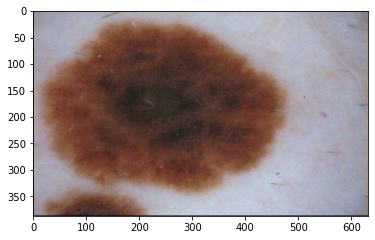

In [ ]:
img = images['d_d199.bmp']
fig, ax = plt.subplots()
ax.imshow(img)


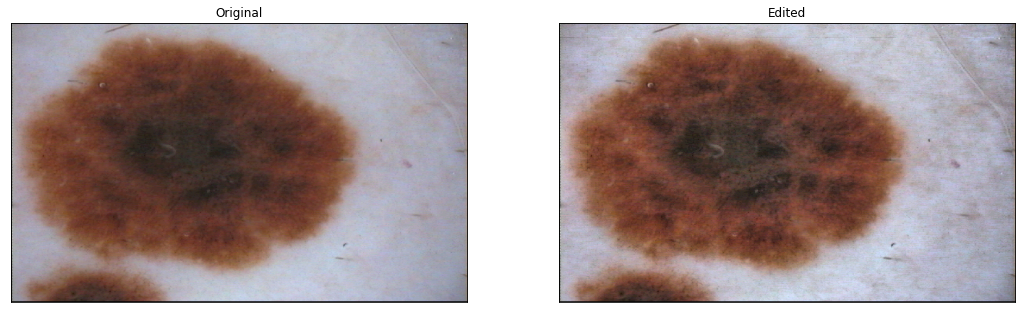

In [ ]:
img_adp= exposure.equalize_adapthist(img, clip_limit=0.03)
#fig, ax = plt.subplots()
#ax.imshow(img_adp)
display_two(img, img_adp)

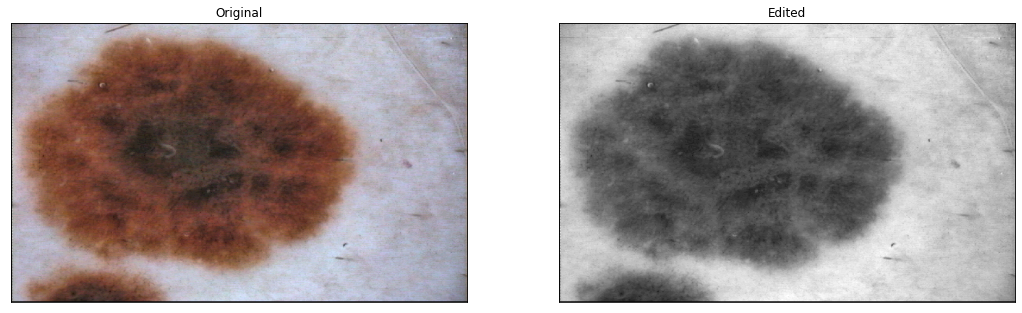

In [ ]:
img_adp_gry=color.rgb2gray(img_adp)
#fig, ax = plt.subplots()
cmap=plt.cm.gray
ax.imshow(img_adp_gry, cmap=cmap)
ax.set_axis_off()#
display_two(img_adp, img_adp_gry, isGray=True)

In [ ]:
img_adp_gry=color.rgb2gray(img_adp)
fig, ax = plt.subplots()
plt.close("all")
canvas = FigureCanvas(fig)
cmap=plt.cm.gray
ax.imshow(img_adp_gry, cmap=cmap)
ax.axis('off')
#https://stackoverflow.com/questions/35355930/matplotlib-figure-to-image-as-a-numpy-array
# draw the canvas, cache the renderer
canvas.draw() 
data = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
img_elp = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

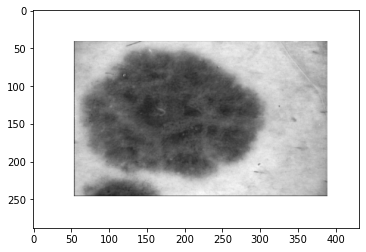

In [ ]:
fig, ax = plt.subplots()
ax.imshow(img_elp)

In [ ]:
img.shape

(387, 632, 3)

## CNN Layers Visualization for skin cancer detection

In [ ]:
%matplotlib inline
import numpy as np
from skimage import io
from keras import backend as K

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/Colab Notebooks/mymodel-2.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        1

In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/"

 64_by_64.h5					   image_preprocessing.ipynb
 computer_vision_intro0.ipynb			   mymodel-2.h5
 computer_vision_intro1.ipynb			   test_image2.jpg
'Copie de Bringing Old Photo Back to Life.ipynb'   test_image.jpg
'Copie de image_preprocessing (1).ipynb'	   test_set
'Copie de image_preprocessing (2).ipynb'	   training_set
'Copie de image_preprocessing.ipynb'		   transfer_learning_test.ipynb


In [ ]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x = x - x.mean()
    x = x / (x.std() + 1e-5)
    x = x * 0.1

    # clip to [0, 1]
    x = x + 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x = x * 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [ ]:
img_deprocess = img 
img_deprocess = deprocess_image(img_deprocess)

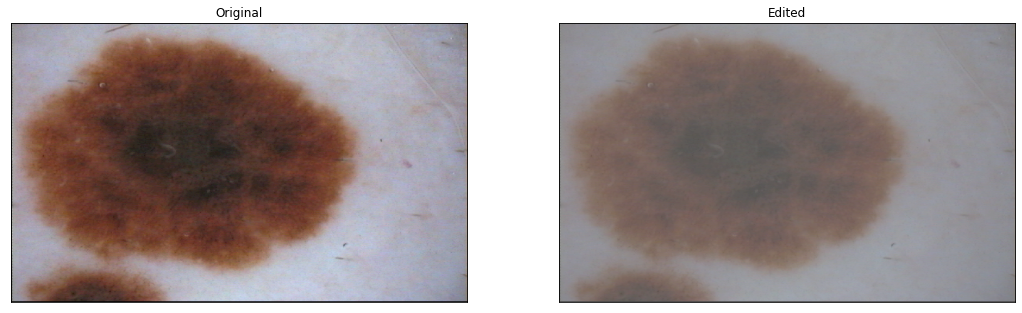

In [ ]:
display_two(img, img_deprocess)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


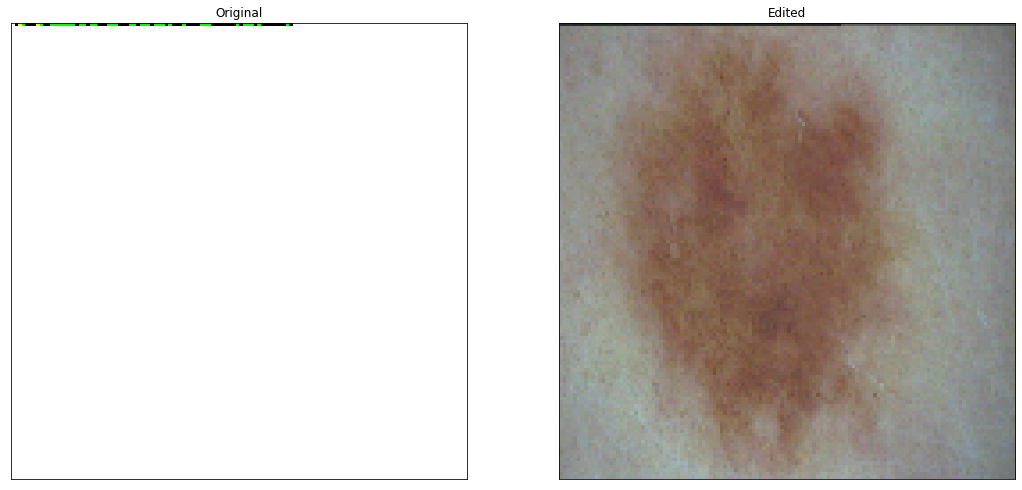

In [ ]:
imgb = ks_image.load_img(folder+filename, target_size = target_size)
imgb = ks_image.img_to_array(imgb) 
img_deprocess2 = deprocess_image(imgb)
display_two(imgb, img_deprocess2)

In [ ]:
def activ_viewer(model, layer_name, im_put):
    #storing layers in a dictionary
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    # recover layer based on name
    layer = layer_dict[layer_name]
    # TBC
    activ1 = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activ1((im_put, False))
    return activations

def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

def plot_filters(filters):
    newimage = np.zeros((16*filters.shape[0],8*filters.shape[1]))
    for i in range(filters.shape[2]):
        y = i%8
        x = i//8
        newimage[x*filters.shape[0]:x*filters.shape[0]+filters.shape[0],
                 y*filters.shape[1]:y*filters.shape[1]+filters.shape[1]] = filters[:,:,i]
    plt.figure(figsize = (10,20))
    plt.imshow(newimage)
    plt.axis('off')

In [ ]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_1': <tensorflow.python.keras.layers.core.Activation at 0x7f6f501da9b0>,
 'activation_2': <tensorflow.python.keras.layers.core.Activation at 0x7f6f501a7c18>,
 'activation_3': <tensorflow.python.keras.layers.core.Activation at 0x7f6f501a7320>,
 'activation_4': <tensorflow.python.keras.layers.core.Activation at 0x7f6f50137080>,
 'activation_5': <tensorflow.python.keras.layers.core.Activation at 0x7f6f50146f98>,
 'conv2d_1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f6f5dd69a58>,
 'conv2d_2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f6f50190f60>,
 'conv2d_3': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f6f501af668>,
 'dense_1': <tensorflow.python.keras.layers.core.Dense at 0x7f6f5013ea20>,
 'dense_2': <tensorflow.python.keras.layers.core.Dense at 0x7f6f50137630>,
 'dropout_1': <tensorflow.python.keras.layers.core.Dropout at 0x7f6f50146ac8>,
 'flatten_1': <tensorflow.python.keras.layers.core.Flatten at 0x7f6f5013ea58>,
 'max_poo

In [ ]:
#not working due to used model not available
"""imgb = ks_image.load_img(folder+filename, target_size = target_size)
imgb = ks_image.img_to_array(imgb)  
#previously 'block3_conv3' but cannot be seen after 
activ_benign = activ_viewer(model,'conv2d_3',imgb.reshape(1,128,128,3))
img_benign = deprocess_image(activ_benign[0])
plot_filters(img_benign[0])"""

"imgb = ks_image.load_img(folder+filename, target_size = target_size)\nimgb = ks_image.img_to_array(imgb)  \n#previously 'block3_conv3' but cannot be seen after \nactiv_benign = activ_viewer(model,'conv2d_3',imgb.reshape(1,128,128,3))\nimg_benign = deprocess_image(activ_benign[0])\nplot_filters(img_benign[0])"

## Skin cancer detection using tensorflow in python
https://www.thepythoncode.com/article/skin-cancer-detection-using-tensorflow-in-python

In [ ]:
import tensorflow as tf

def process_path(filepath, label):
  # load the raw data from the file as a string
  img = tf.io.read_file(filepath)
  # convert the compressed string to a 3D uint8 tensor
  # https://www.tensorflow.org/api_docs/python/tf/io/decode_bmp
  img = tf.image.decode_bmp(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  #because what InceptionV3 architecture
  img = tf.image.resize(img, [299, 299])
  return img, label

In [ ]:
img_tf = tf.io.read_file(filepath)
img_tf = tf.image.decode_bmp(img_tf, channels=3)


In [ ]:
label = 'd_d199.bmp'
filepath = folder + label
img_tf_processed, label = process_path(filepath, label)
display_two(img_tf, img_tf_processed)

In [ ]:
#https://stackoverflow.com/questions/42161916/tensorflow-how-to-switch-channels-of-a-tensor-from-rgb-to-bgr
img_bgr = img_tf[..., ::-1]
display_two(img_tf, img_bgr)

In [ ]:
img = images['d_d199.bmp']
img_edited = preprocess_image(img)
display_two(img, img_edited)

## Open CV reducing noises

### Median Blur

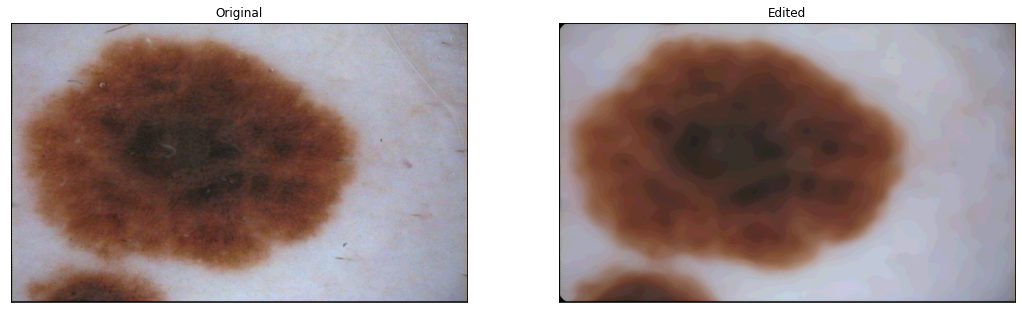

In [ ]:
#example of medianblur extracted from op projects
#https://www.programcreek.com/python/example/89374/cv2.medianBlur

#blurring kernel size
KSIZE = 17

img_medianblur = cv2.medianBlur(img,ksize=KSIZE)
display_two(img, img_medianblur)

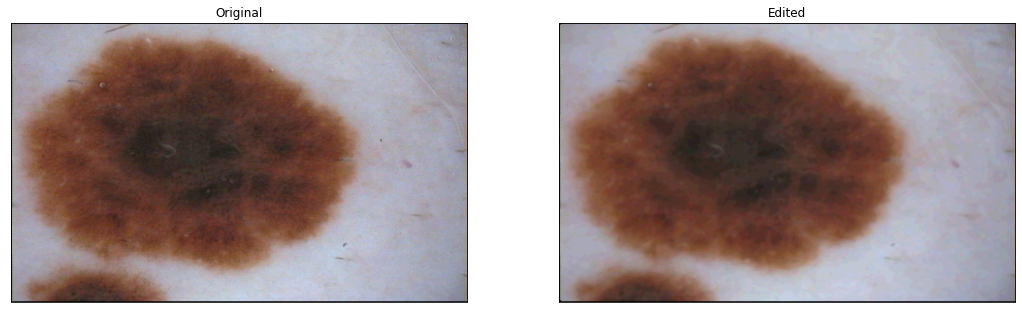

In [ ]:
#example of medianblur extracted from op projects
#https://www.programcreek.com/python/example/89374/cv2.medianBlur

#blurring kernel size
KSIZE = 5

img_medianblur = cv2.medianBlur(img,ksize=KSIZE)
display_two(img, img_medianblur)

### Bilateral filtering

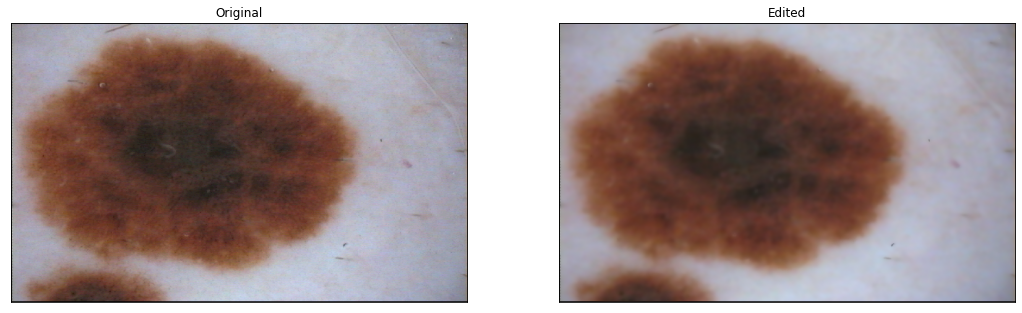

In [ ]:
D = 9
SIGMACOLOR = 75
SIGMASPACE = 75 #sigmaSpace[, borderType]]

img_bilateralfilter = cv2.bilateralFilter(img, d=D, sigmaColor=SIGMACOLOR, sigmaSpace=SIGMASPACE)
display_two(img, img_bilateralfilter)


Bilateral filtering sources
http://people.csail.mit.edu/sparis/bf_course/
[intro](http://people.csail.mit.edu/sparis/bf_course/slides/06_implementation.pdf)
[applications](http://people.csail.mit.edu/sparis/bf_course/slides/08_applications_advanced.pdf)



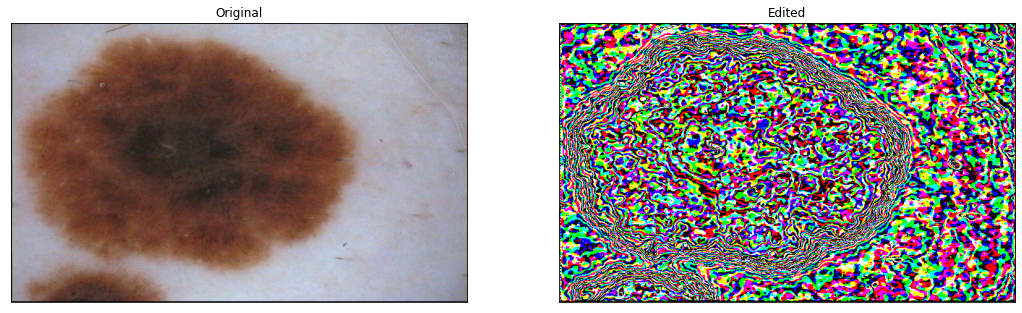

In [ ]:
#checking difference between filters
diff = img_bilateralfilter - img_medianblur
display_two(img, diff)

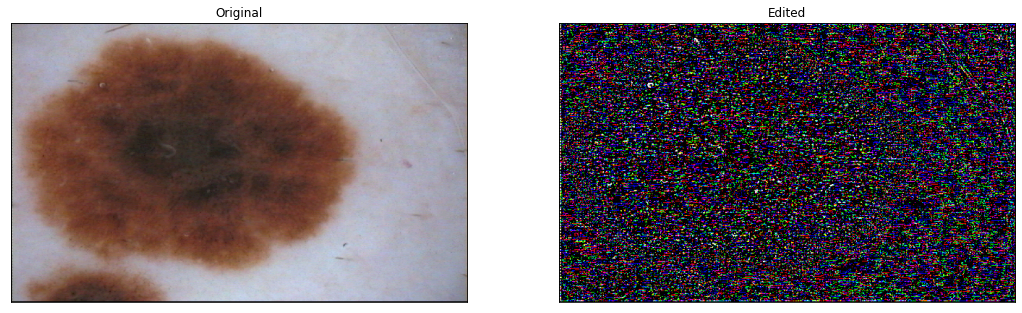

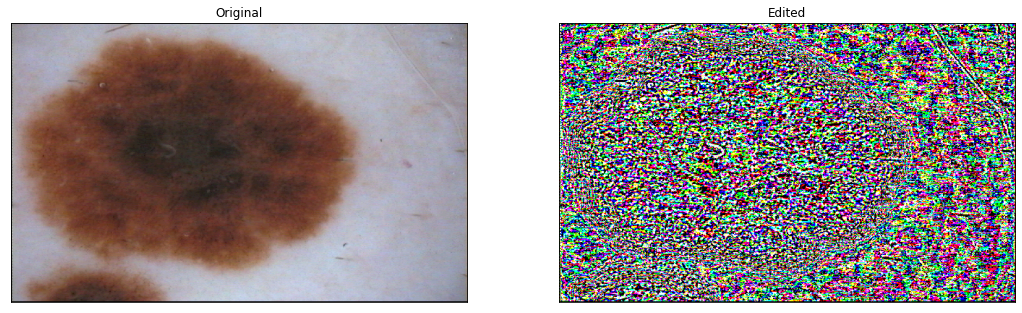

In [ ]:
#checking difference between filters
blur_img = img_medianblur - img
display_two(img, blur_img)

#checking difference between filters
bil_img = img_bilateralfilter - img
display_two(img, bil_img)

## VGG16 preprocessing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


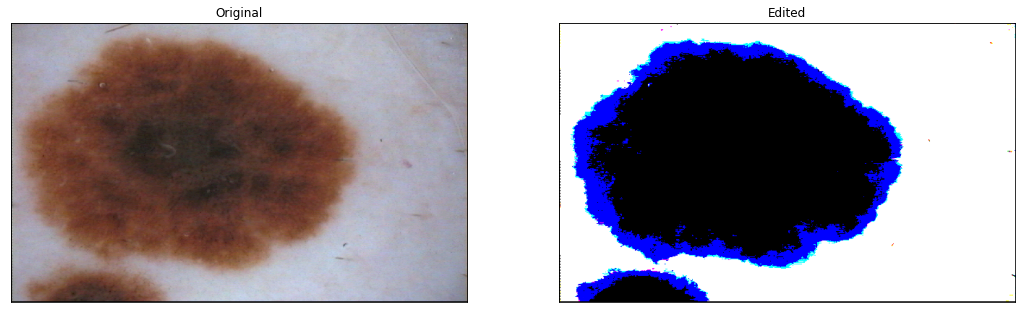

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
img_vgg16 = preprocess_input(img, data_format=None)
display_two(img, img_vgg16)

## imgaug

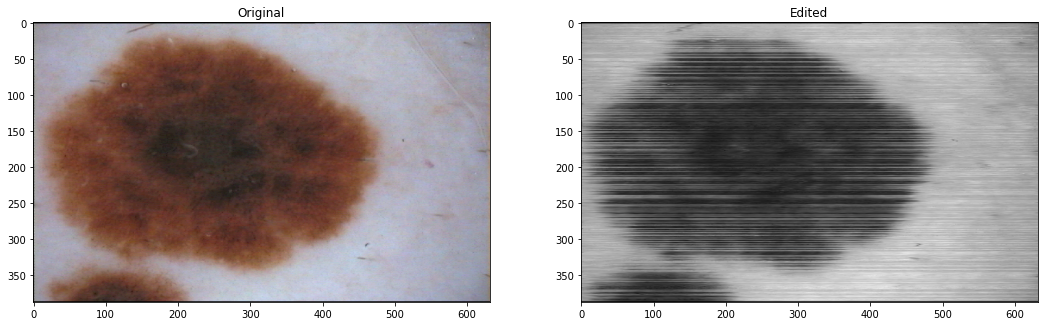

In [ ]:
from imgaug import augmenters as iaa

seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])

img_aug = seq(images=img)

display_two(img, img_aug)

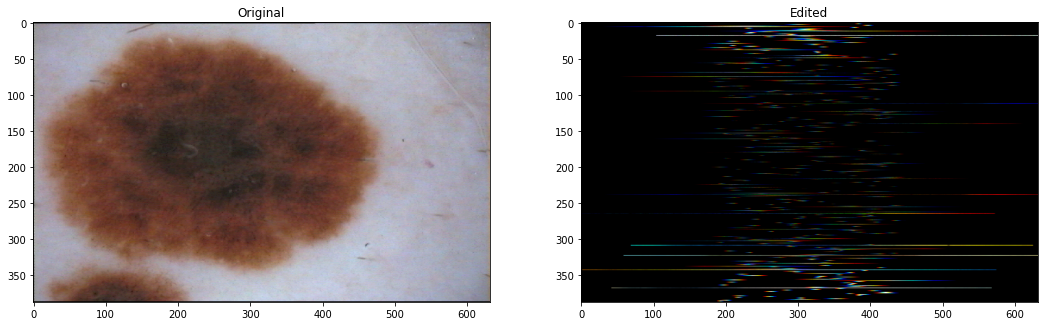

In [ ]:
seq2 = iaa.Sequential([    
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

img_aug2 = seq2(images=img)

display_two(img, img_aug2)

# Archived testing

## skimage removing small objects
Not required since VGG16 and bilateral filtering seem enough

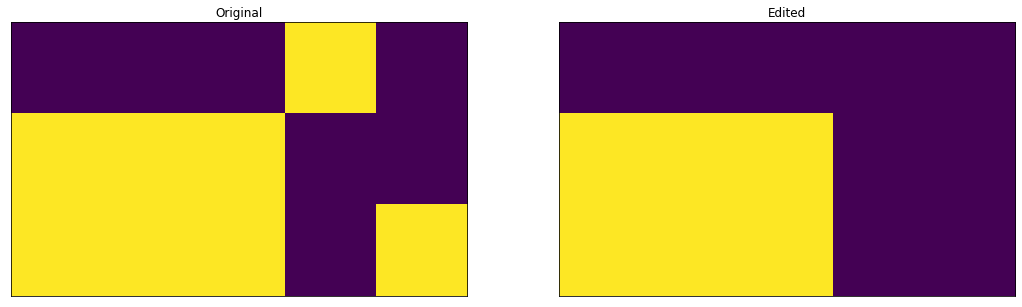

In [ ]:
#example
#https://scikit-image.org/docs/0.13.x/api/skimage.morphology.html#skimage.morphology.remove_small_objects

from skimage import morphology
a = np.array([[0, 0, 0, 1, 0],
             [1, 1, 1, 0, 0],
             [1, 1, 1, 0, 1]], bool)
b = morphology.remove_small_objects(a, 6)
display_two(a, b)

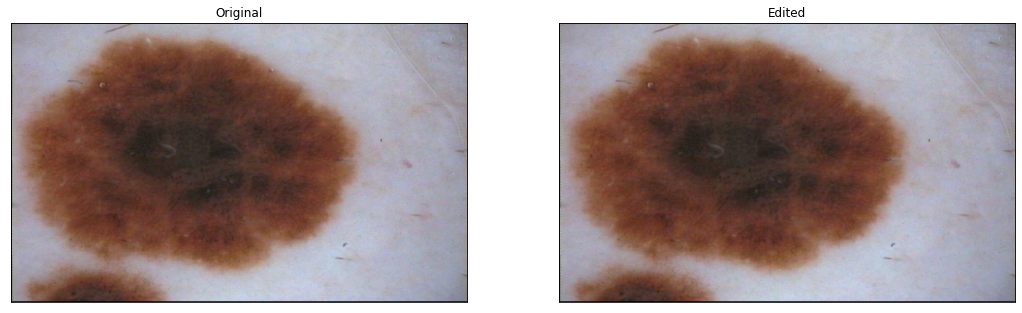

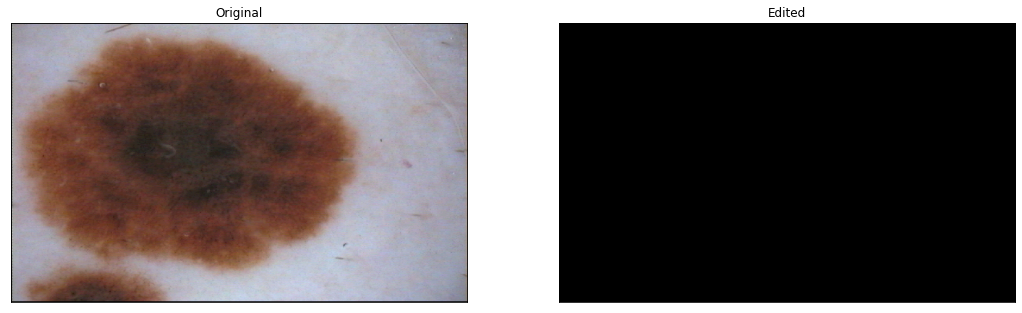

In [ ]:
img_remove_objects = morphology.remove_small_objects(img, 1)
display_two(img, img_remove_objects)
#check if something happening
diff = img_remove_objects - img
display_two(img, diff)


In [ ]:
from skimage import morphology
MIN_SIZE = 5000000 #500
AREA_THRESHOLD = 5000000

img_adp_gry=color.rgb2gray(img)
canvas = FigureCanvas(fig)  
cmap=plt.cm.gray
mask_removing = morphology.remove_small_holes(ar = morphology.remove_small_objects(ar= img_adp_gry < 0.7, min_size=MIN_SIZE), area_threshold=AREA_THRESHOLD)
mask = morphology.opening(mask_removing, morphology.disk(radius=1))
ax.imshow(img_adp_gry, cmap=cmap)
ax.axis('off')
canvas.draw() 
data = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
img_elp = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

display_two(img, img_elp)